[[ 0.          0.09983342  0.19866933 ... -0.27176063 -0.36647913
  -0.45753589]
 [ 0.09983342  0.19866933  0.29552021 ... -0.36647913 -0.45753589
  -0.54402111]
 [ 0.19866933  0.29552021  0.38941834 ... -0.45753589 -0.54402111
  -0.62507065]
 ...
 [ 0.98648244  0.96519474  0.93426312 ... -0.90482346 -0.85779535
  -0.80219643]
 [ 0.96519474  0.93426312  0.89399666 ... -0.85779535 -0.80219643
  -0.73858223]
 [ 0.93426312  0.89399666  0.84479768 ... -0.80219643 -0.73858223
  -0.66758835]]


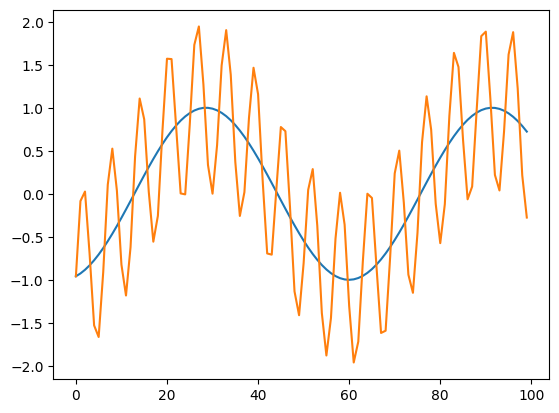

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Gera o sinal senoidal de 1000 periodos
time = np.arange(0, 1000, 0.1);
amplitude = np.sin(time)

slider = []

# Janela móvel de 100 amostras com passo de 1 amostra
for i in range(0, 900):
  slider.append(amplitude[i:i+100])
  
slider = np.array(slider)
print(slider)

plt.plot(slider[50])
# Distorce o sinal senoidal de uma das janelas
slider[50] = slider[50] + np.sin(time[0:100] * 10)

senoide_com_ruido = slider
senoide_com_ruido[50] = slider[50]

plt.plot(senoide_com_ruido[50])

Epoch [1/100], Loss: 0.4089
Epoch [2/100], Loss: 0.1966
Epoch [3/100], Loss: 0.0517
Epoch [4/100], Loss: 0.0168
Epoch [5/100], Loss: 0.0069
Epoch [6/100], Loss: 0.0040
Epoch [7/100], Loss: 0.0027
Epoch [8/100], Loss: 0.0020
Epoch [9/100], Loss: 0.0015
Epoch [10/100], Loss: 0.0012
Epoch [11/100], Loss: 0.0009
Epoch [12/100], Loss: 0.0008
Epoch [13/100], Loss: 0.0007
Epoch [14/100], Loss: 0.0006
Epoch [15/100], Loss: 0.0005
Epoch [16/100], Loss: 0.0005
Epoch [17/100], Loss: 0.0004
Epoch [18/100], Loss: 0.0004
Epoch [19/100], Loss: 0.0003
Epoch [20/100], Loss: 0.0003
Epoch [21/100], Loss: 0.0003
Epoch [22/100], Loss: 0.0003
Epoch [23/100], Loss: 0.0003
Epoch [24/100], Loss: 0.0003
Epoch [25/100], Loss: 0.0002
Epoch [26/100], Loss: 0.0002
Epoch [27/100], Loss: 0.0002
Epoch [28/100], Loss: 0.0002
Epoch [29/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [31/100], Loss: 0.0002
Epoch [32/100], Loss: 0.0002
Epoch [33/100], Loss: 0.0002
Epoch [34/100], Loss: 0.0002
Epoch [35/100], Loss: 0

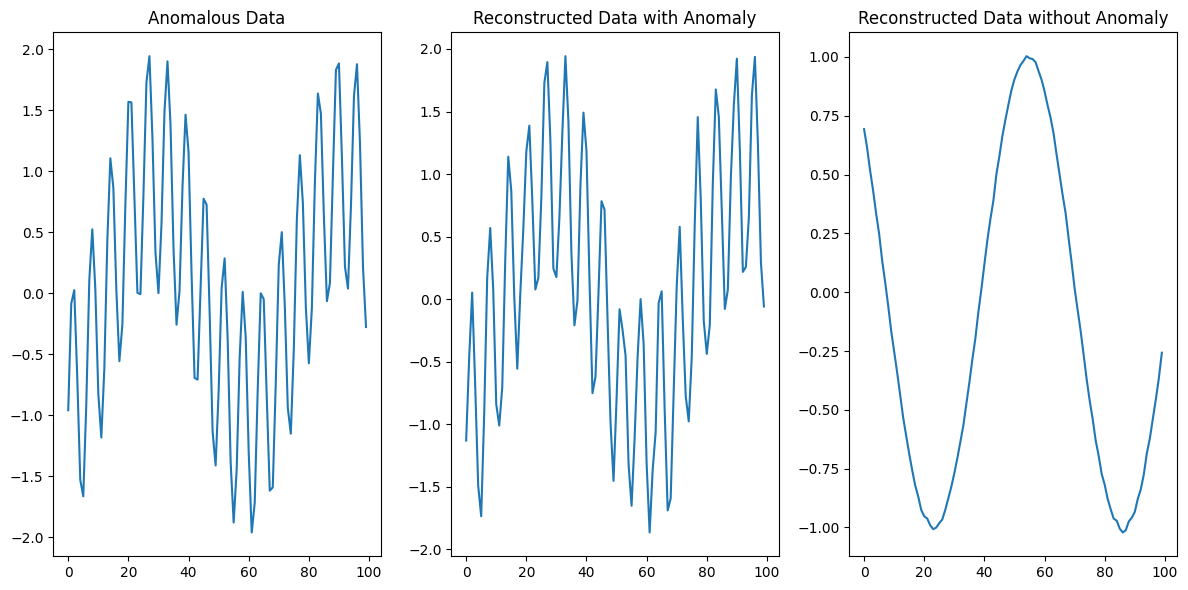

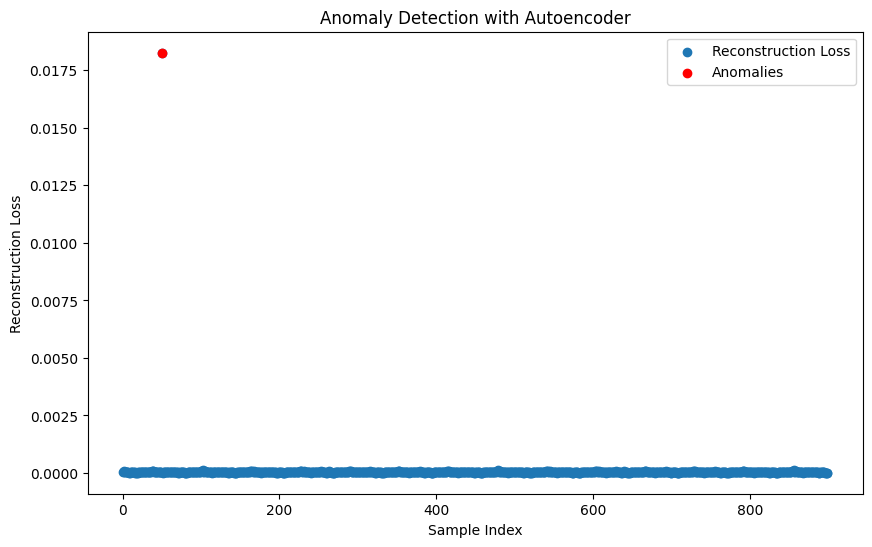

In [3]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define os dados normais e os dados com anomalia
normal_data = torch.tensor(slider, dtype=torch.float32)
anomalous_data = torch.tensor(senoide_com_ruido, dtype=torch.float32)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(100, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 100)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.0003)

# Treina o modelo com os dados normais
num_epochs = 100
batch_size = 32

# Converte os dados para float32
normal_data = normal_data.to(torch.float32)

# Training loop
for epoch in range(num_epochs):
    for i in range(0, len(normal_data), batch_size):
        batch = normal_data[i:i + batch_size] 
        optimizer.zero_grad()
        outputs = autoencoder(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

anomalous_data = anomalous_data.to(torch.float32)

# Testa o modelo com os dados normais e com os dados com anomalia
autoencoder.eval()
with torch.no_grad():
    reconstructed_data = autoencoder(anomalous_data)
    
    
    reconstruction_loss = torch.mean((anomalous_data - reconstructed_data) ** 2, dim=1)
    
# Plot dos dados
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(anomalous_data[50])
plt.title('Anomalous Data')
plt.subplot(132)
plt.plot(reconstructed_data[50])
plt.title('Reconstructed Data with Anomaly')
plt.subplot(133)

# Random number [0 - 49]
rng = random.randint(0, 49)

plt.plot(reconstructed_data[rng])
plt.title('Reconstructed Data without Anomaly')
plt.tight_layout()

# Calcula o threshold para detecção de anomalias
threshold = 0.01  

anomaly_indices = torch.where(reconstruction_loss > threshold)[0]

# Print dos indices das anomalias
print("Anomaly Indices:", anomaly_indices)

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(reconstruction_loss)), reconstruction_loss, label='Reconstruction Loss')
plt.scatter(anomaly_indices, reconstruction_loss[anomaly_indices], c='red', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection with Autoencoder')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Loss')
plt.show()